In [5]:
import geopandas as gpd
import pandas as pd
import requests

src = "https://covidtracking.com/api/states/daily"
src_data = requests.get(src).json()[::-1]

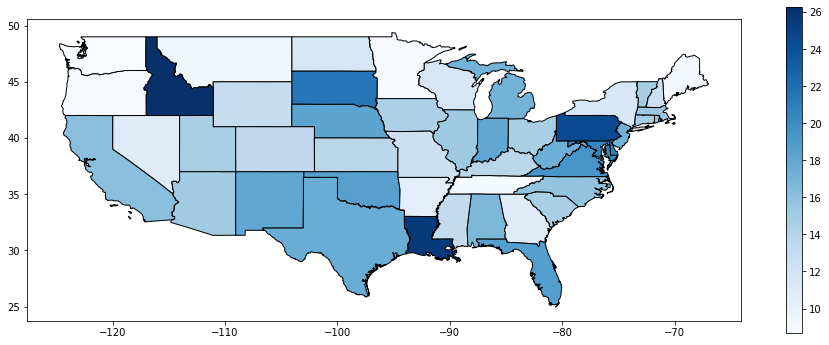

In [7]:
states = list(set([s["state"] for s in src_data]))

recent_days = 4

all_states = []
for state in states:
    data = [{ **s, "positive": s["positive"] if s["positive"] else 0 } for s in src_data if s["state"] == state]
    now = data[-1]["positive"]
    then = data[-1 - recent_days]["positive"]
    recent_increase_rate = ((now / then) - 1) / recent_days if then > 0 else 0
    all_states.append({
        "fips": data[0]["fips"],
        "state": state,
        "recent_increase_rate": recent_increase_rate * 100
        })

df = pd.DataFrame(all_states, columns=all_states[0].keys())

gdf = gpd.read_file('shp/states.shp')[['STATE_NAME','STATE_ABBR','geometry']]
gdf.columns = ['state_name', 'state', 'geometry']
idx = gdf['state'].tolist().index('AK')
gdf.drop(index=idx, inplace=True)
idx = gdf['state'].tolist().index('HI')
gdf.drop(index=idx, inplace=True)

gdf = gdf.merge(df, left_on='state', right_on='state')
gdf.plot(k=12, figsize=(16,6), column='recent_increase_rate', cmap="Blues", legend=True, edgecolor="Black")



